# Titanic Disaster Survival Prediction


The Titanic was a catastrophy in itself.  
We are provided with the dataset which contains various attributes of the passengers onboard such as Age, Gender, etc.  
  
We will be using a suitable model to predict survival probability of the passengers based on various attributes.  

## Sections:  
1. <a href=#Data-Wrangling>Data Wrangling Phase</a>
2. <a href=#Data-Exploration>Data Exploration Phase</a>

## Data Wrangling

The Dataset contains:  
  
1. *survival*: Depicts Survival of the passenger. 0 = No, 1 = Yes  
2. *pclass*: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd  
3. *sex*: Sex of the passenger. male or female  	
4. *Age*: Age in years.   	
5. *sibsp*: no. of siblings / spouses aboard the Titanic.  	
6. *parch*:	no. of parents / children aboard the Titanic.  	
7. *ticket*: Ticket number.  	
8. *fare*: Passenger fare.  	
9. *cabin*: Cabin number.  	
10. *embarked*: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton.  

In [1]:
#importing necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("..\\Datasets\\train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Age

In [5]:
sorted(data['Age'].unique())

[0.83,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 0.42,
 0.67,
 0.75,
 0.92,
 1.0,
 6.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.5,
 20.5,
 23.5,
 24.5,
 30.5,
 32.5,
 34.5,
 36.0,
 36.5,
 37.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0]

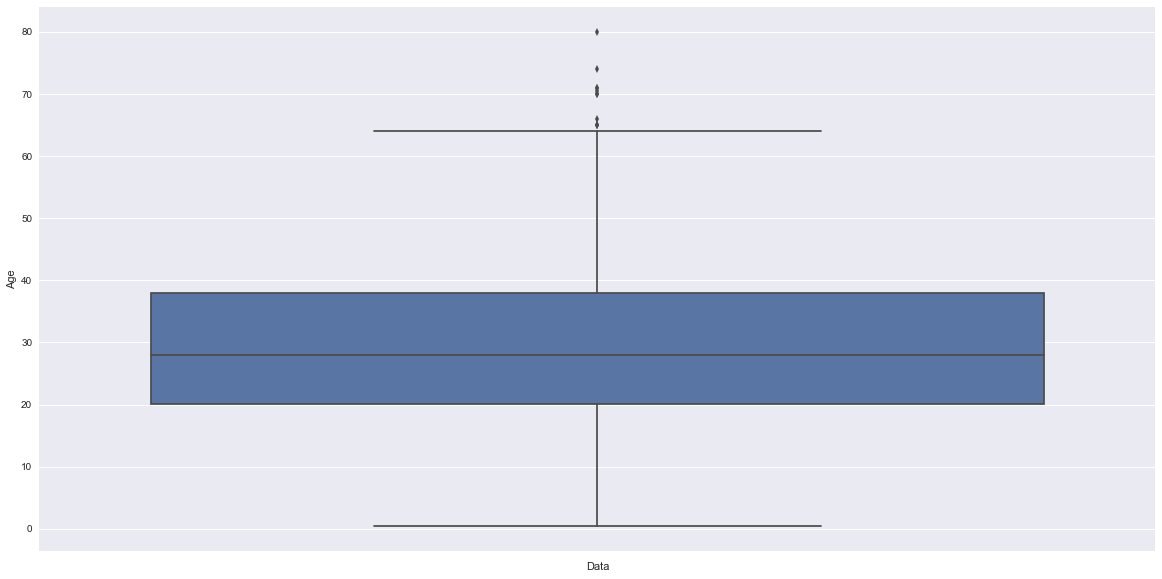

In [6]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", palette="muted")
sns.set(rc={'figure.figsize':(20.0,5.0)})
sns.set(color_codes=True)
ax = sns.boxplot(y=data['Age'])
plt.ylabel('Age')
plt.xlabel('Data')
plt.show()

First of all, the there are missing values in Age or NaN values.  
Also, there are values less than 1 for Age.  
We see that there are outliers in Age around 65 but an age around 80 is not that strange. 

It is given in dataset that Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

Correcting age. Replacing nan and >1 with mean.

In [7]:
data[data['Age'] < 1.0].count()

PassengerId    7
Survived       7
Pclass         7
Name           7
Sex            7
Age            7
SibSp          7
Parch          7
Ticket         7
Fare           7
Cabin          1
Embarked       7
dtype: int64

In [8]:
data[data['Age'].isnull()].count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

In [9]:
data[data['Age'] < 1.0] = np.NaN
data['Age']= data['Age'].fillna((data['Age'].median()))
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,884.000000,884.000000,884.000000,891.000000,884.000000,884.000000,884.000000
mean,445.128959,0.378959,2.308824,29.575758,0.519231,0.374434,32.164158
std,257.123194,0.485403,0.837060,12.768603,1.104235,0.804195,49.712115
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's see other attributes too.  


### SibSp

In [10]:
sorted(data['SibSp'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 8.0]

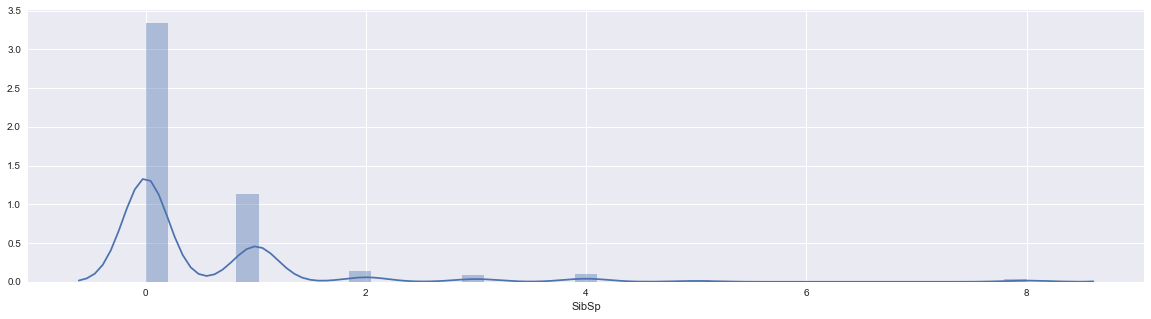

In [11]:
sns.distplot(data['SibSp'].dropna())

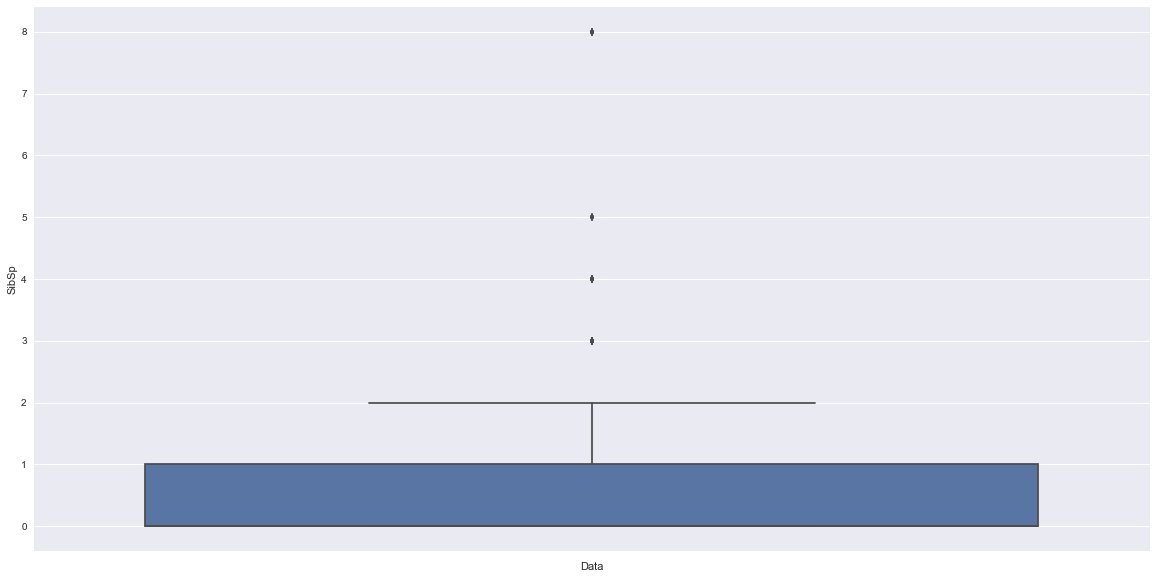

In [12]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y=data['SibSp'])
plt.ylabel('SibSp')
plt.xlabel('Data')
plt.show()

In [13]:
data['SibSp']= data['SibSp'].fillna((round(data['SibSp'].mean())))

### Parch

In [14]:
sorted(data['Parch'].unique())

[0.0, 1.0, 2.0, 5.0, nan, 3.0, 4.0, 6.0]

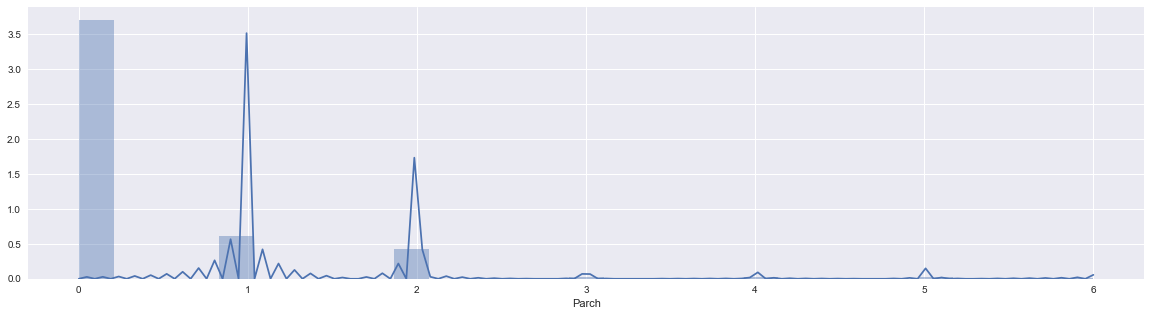

In [15]:
sns.distplot(data['Parch'].dropna())

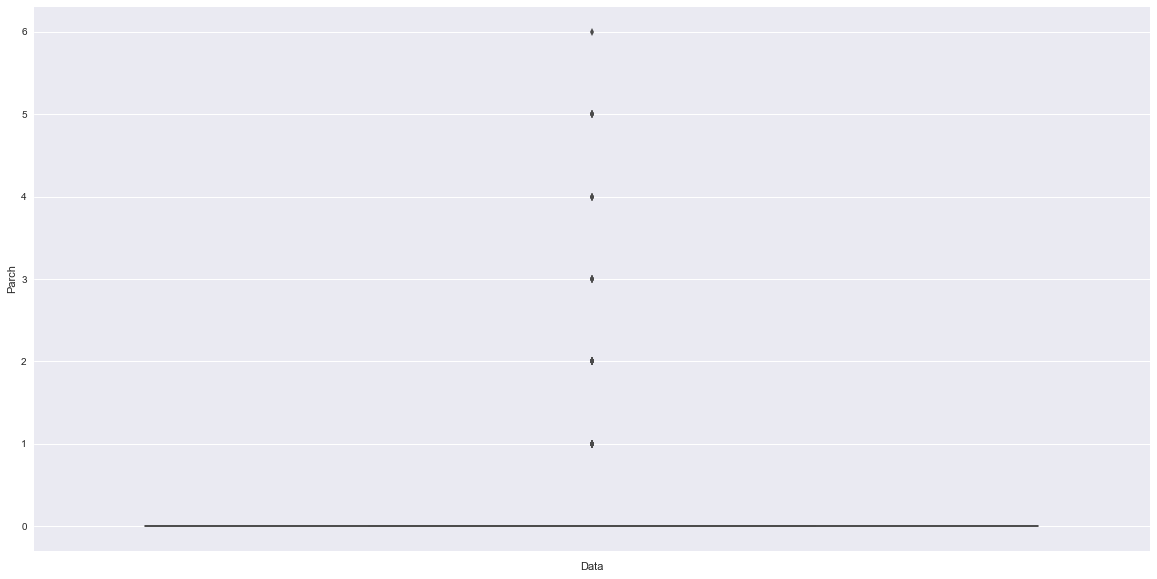

In [16]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y=data['Parch'])
plt.ylabel('Parch')
plt.xlabel('Data')
plt.show()

In [17]:
data['Parch']= data['Parch'].fillna((round(data['Parch'].mean())))

### Pclass

In [18]:
sorted(data['Pclass'].unique())

[1.0, 2.0, 3.0, nan]

In [19]:
data['Pclass']= data['Pclass'].fillna((round(data['Pclass'].mean())))

In [20]:
sorted(data['Pclass'].unique())

[1.0, 2.0, 3.0]

### Embarked

In [21]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
##U for Unknown
data['Embarked']= data['Embarked'].fillna('U')

In [23]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', 'U'], dtype=object)

### Gender

In [24]:
data['Sex'].unique()

array(['male', 'female', nan], dtype=object)

In [25]:
data.drop(columns=['Name', 'Cabin','Ticket'], inplace=True)
data = pd.get_dummies(data, dummy_na=True,drop_first=True)

In [26]:
#data = pd.concat([data, df], axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_nan,Embarked_Q,Embarked_S,Embarked_U,Embarked_nan
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,0,1,0,0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0,0,0,0,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,0,1,0,0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,0,1,0,0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,0,1,0,0


In [27]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Sex_nan', 'Embarked_Q', 'Embarked_S', 'Embarked_U',
       'Embarked_nan'],
      dtype='object')

## Exploring Relationships among Attributes

In [28]:
#a function to create a probability from the data
def prob(factor):
    df = pd.crosstab(index=data[factor], columns=data['Survived']).reset_index()
    df['probSurvived'] = df[1] / (df[1] + df[0])
    return( df[[factor, 'probSurvived']])

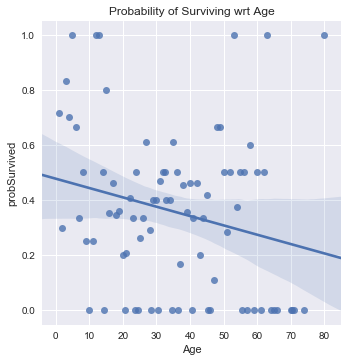

In [29]:
sns.lmplot(data = prob('Age'), x = 'Age', y = 'probSurvived', fit_reg = True)
plt.title('Probability of Surviving wrt Age')
plt.show()

In [30]:
import scipy.stats
print(scipy.stats.pearsonr(prob('Age')['Age'], prob('Age')['probSurvived']))

(-0.23086019289298915, 0.03574696486369647)


According to http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/ :
A very weak downward relationship. > 0.5 or < -0.5 is high information gain...

According to http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/ :
This relationship is statistically significant, thus useful.

This means that as Age increases, Survival Probability decreases.

In [31]:
def category(factor):
    rows = []
    for item in data[factor].unique():
        row = {'Condition': factor}
        total = len(data[data[factor] == item])
        n = len(data[(data[factor] == item) & (data['Survived'] == 1)])
        prob = n / total
        row.update({'Level': item, 'Probability': prob})
        rows.append(row)
    return pd.DataFrame(rows)

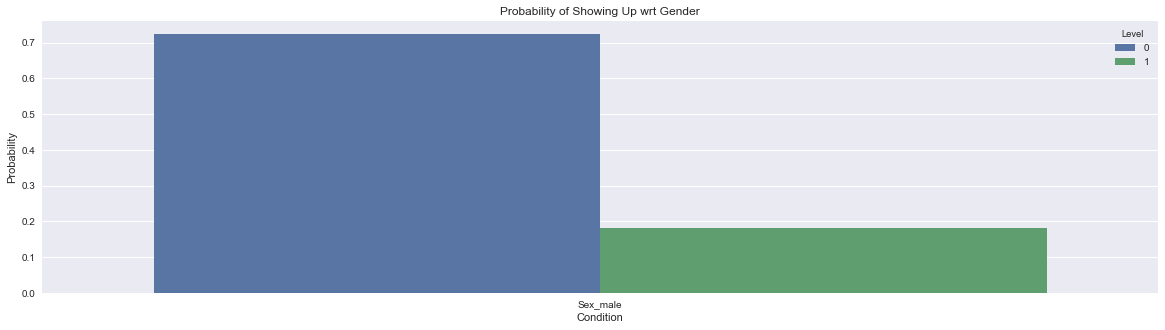

In [32]:
sns.barplot(data = category('Sex_male'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Gender')
plt.show()

This means that Females have a High Survival Probability.

## Prepare dataset for Machine Learning processing

In [33]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_nan,Embarked_Q,Embarked_S,Embarked_U,Embarked_nan
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,0,1,0,0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0,0,0,0,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,0,1,0,0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,0,1,0,0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,0,1,0,0
5,6.0,0.0,3.0,28.0,0.0,0.0,8.4583,1,0,1,0,0,0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,1,0,0,1,0,0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,1,0,0,1,0,0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0,0,0,1,0,0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0,0,0,0,0,0


## Fit model(s)

## Evaluate results